In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
########################################          QUESTION 1  ###########################

In [59]:
path="/content/drive/MyDrive/SalaryData.csv"
data=pd.read_csv(path)

In [60]:
data.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [61]:
# Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Salary ~ Occupation',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                  sum_sq    df         F    PR(>F)
Occupation  1.125878e+10   3.0  0.884144  0.458508
Residual    1.528092e+11  36.0       NaN       NaN


In [62]:
#Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Salary ~ Education',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


                 sum_sq    df         F        PR(>F)
Education  1.026955e+11   2.0  30.95628  1.257709e-08
Residual   6.137256e+10  37.0       NaN           NaN


In [65]:
# Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

model = ols('Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)', data=data).fit()
p=sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


In [66]:
p

sum_sq    df          F    PR(>F)
C(Education)                3.155899e+10   2.0  22.191208  0.000057
C(Occupation)               8.259641e+09   3.0   3.871932  0.032329
C(Education):C(Occupation)  4.227791e+10   6.0   9.909463  0.000013
Residual                    2.062102e+10  29.0        NaN       NaN

In [ ]:
############################################# QUESTION 2 #########################################

In [5]:
path="/content/drive/MyDrive/Education+-+Post+12th+Standard.csv"
d=pd.read_csv(path)

In [6]:
d.describe()

Apps        Accept  ...        Expend  Grad.Rate
count    777.000000    777.000000  ...    777.000000  777.00000
mean    3001.638353   2018.804376  ...   9660.171171   65.46332
std     3870.201484   2451.113971  ...   5221.768440   17.17771
min       81.000000     72.000000  ...   3186.000000   10.00000
25%      776.000000    604.000000  ...   6751.000000   53.00000
50%     1558.000000   1110.000000  ...   8377.000000   65.00000
75%     3624.000000   2424.000000  ...  10830.000000   78.00000
max    48094.000000  26330.000000  ...  56233.000000  118.00000

[8 rows x 17 columns]

In [7]:
d.head()

Names  Apps  Accept  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University  1660    1232  ...           12    7041         60
1            Adelphi University  2186    1924  ...           16   10527         56
2                Adrian College  1428    1097  ...           30    8735         54
3           Agnes Scott College   417     349  ...           37   19016         59
4     Alaska Pacific University   193     146  ...            2   10922         15

[5 rows x 18 columns]

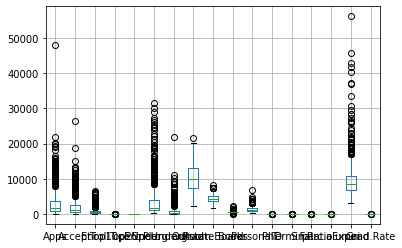

In [8]:
d.boxplot()

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

Text(0.5, 1.0, 'Grad.Rate Distribution')

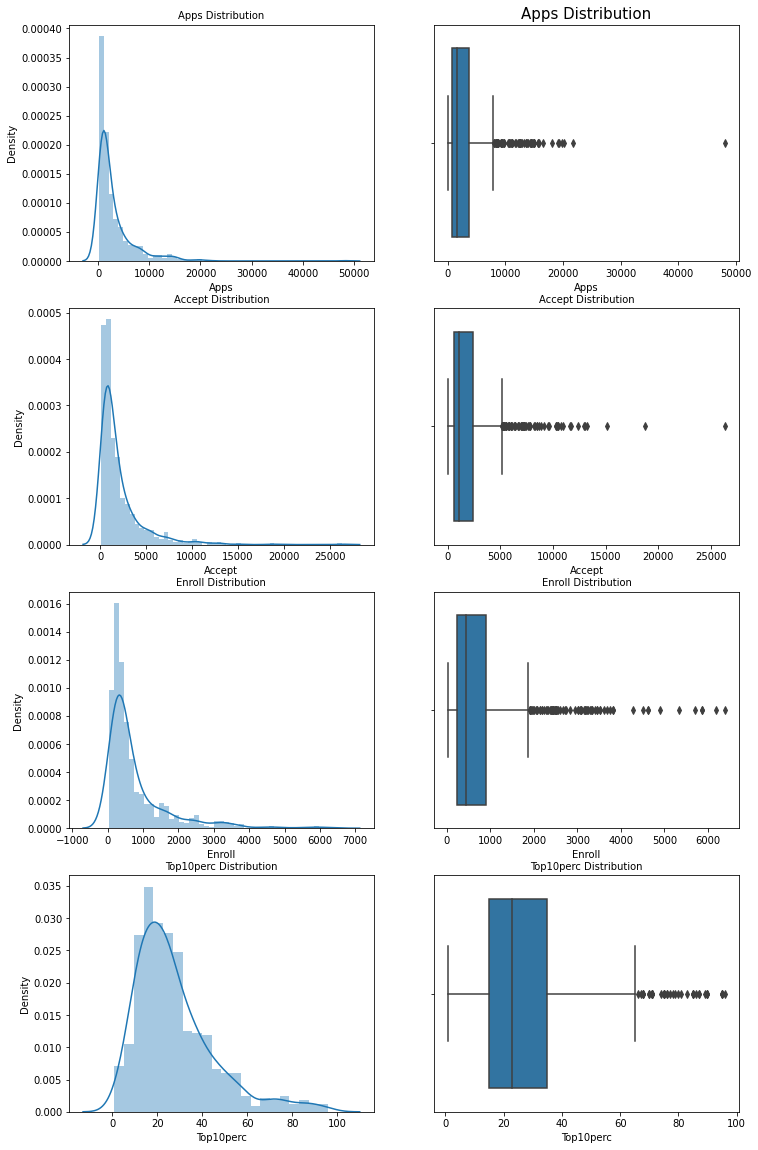

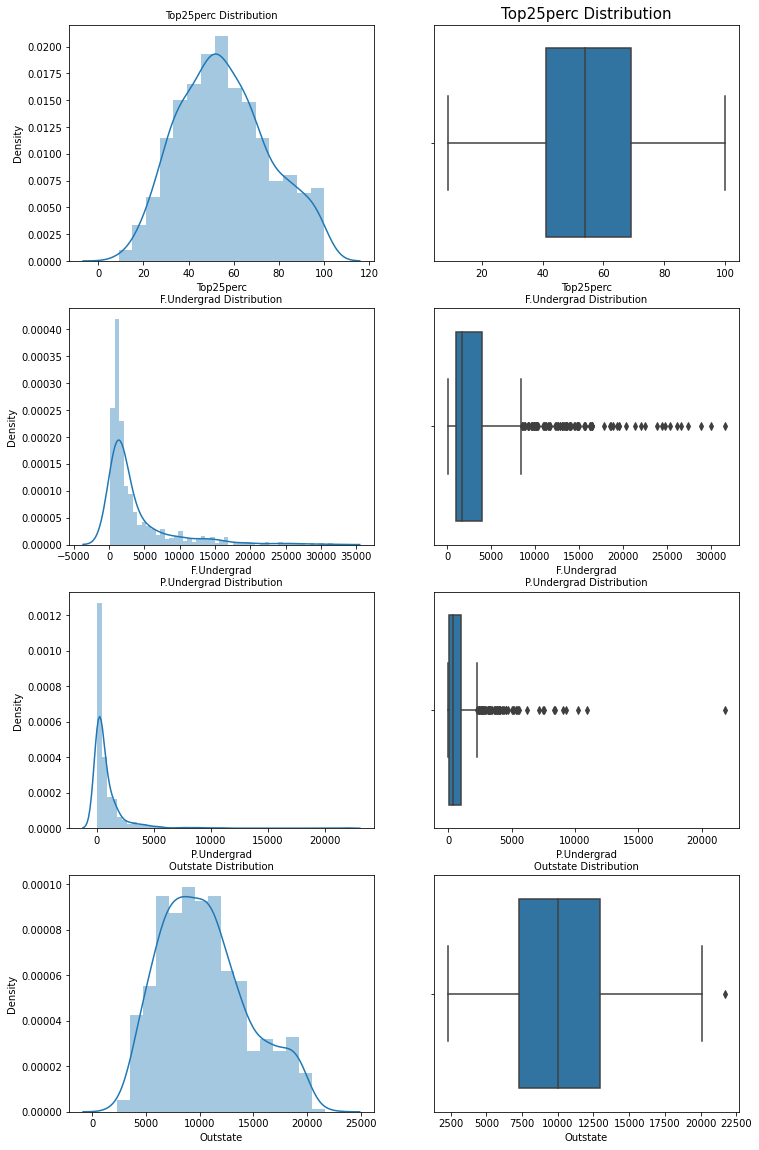

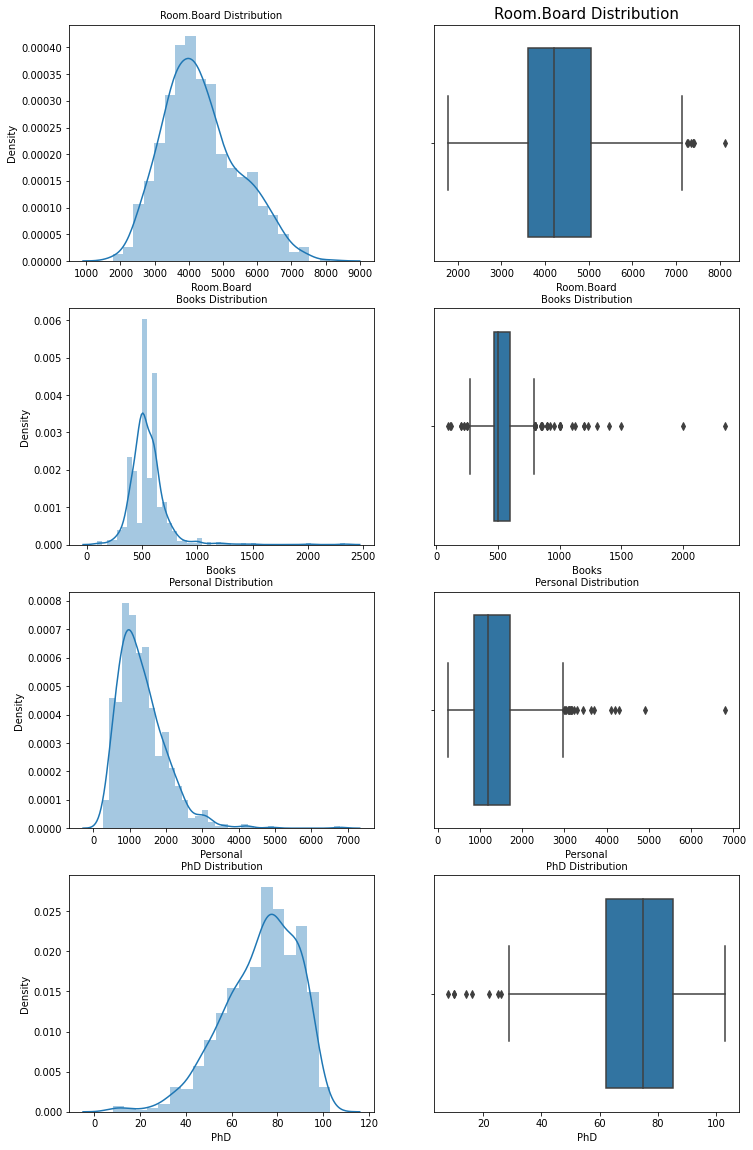

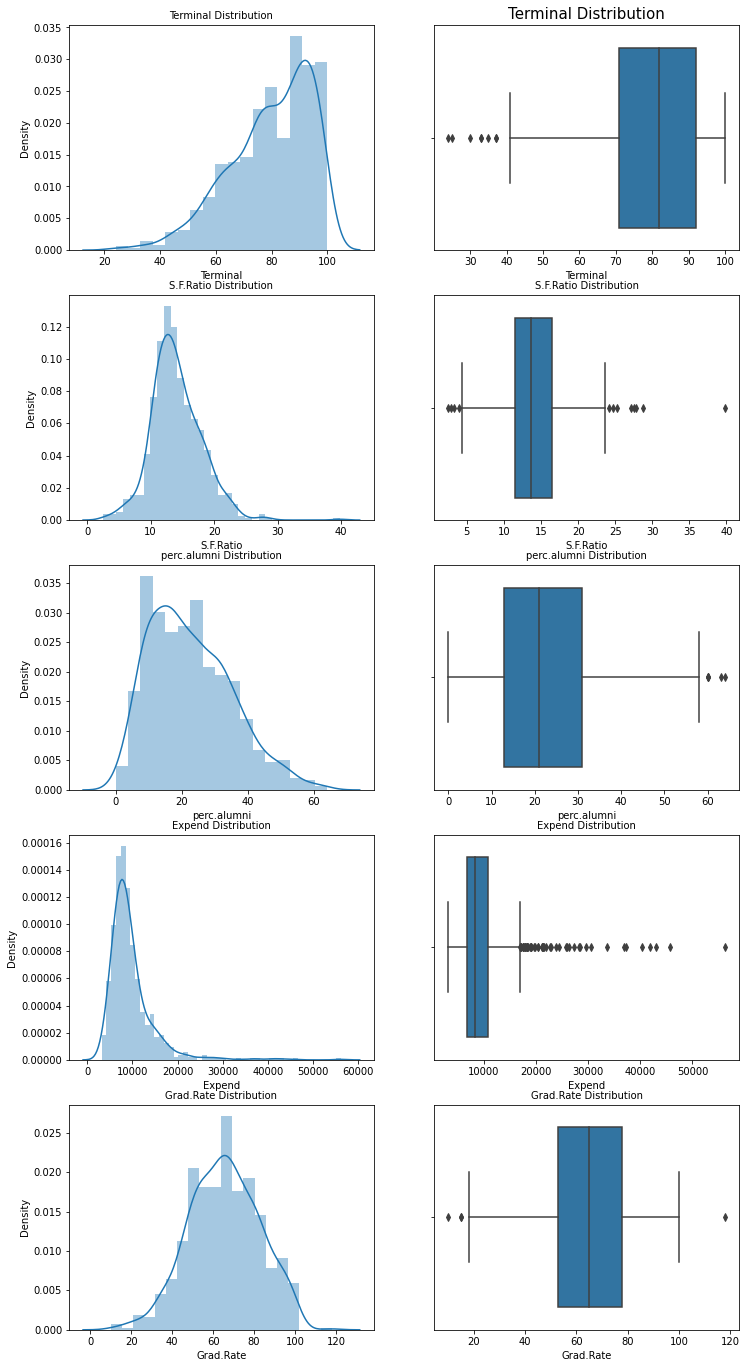

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(d['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(d['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(d['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)

a = sns.boxplot(d['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(d['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(d['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.distplot(d['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(d['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)




fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(d['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.boxplot(d['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(d['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(d['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(d['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(d['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.distplot(d['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(d['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(d['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.boxplot(d['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(d['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(d['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(d['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(d['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)

a = sns.distplot(d['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(d['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 24)
a = sns.distplot(d['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.boxplot(d['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(d['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(d['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(d['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(d['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.distplot(d['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(d['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(d['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(d['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)


In [12]:
d_1 = d.corr()
d_1

Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
Apps         1.000000  0.943451  0.846822  ...    -0.090226  0.259592   0.146755
Accept       0.943451  1.000000  0.911637  ...    -0.159990  0.124717   0.067313
Enroll       0.846822  0.911637  1.000000  ...    -0.180794  0.064169  -0.022341
Top10perc    0.338834  0.192447  0.181294  ...     0.455485  0.660913   0.494989
Top25perc    0.351640  0.247476  0.226745  ...     0.417864  0.527447   0.477281
F.Undergrad  0.814491  0.874223  0.964640  ...    -0.229462  0.018652  -0.078773
P.Undergrad  0.398264  0.441271  0.513069  ...    -0.280792 -0.083568  -0.257001
Outstate     0.050159 -0.025755 -0.155477  ...     0.566262  0.672779   0.571290
Room.Board   0.164939  0.090899 -0.040232  ...     0.272363  0.501739   0.424942
Books        0.132559  0.113525  0.112711  ...    -0.040208  0.112409   0.001061
Personal     0.178731  0.200989  0.280929  ...    -0.285968 -0.097892  -0.269344
PhD          0.390697  0.355758  0.331469  ...     0.249009  0.432762   0.305038
Terminal     0.369491  0.337583  0.308274  ...     0.267130  0.438799   0.289527
S.F.Ratio    0.095633  0.176229  0.237271  ...    -0.402929 -0.583832  -0.306710
perc.alumni -0.090226 -0.159990 -0.180794  ...     1.000000  0.417712   0.490898
Expend       0.259592  0.124717  0.064169  ...     0.417712  1.000000   0.390343
Grad.Rate    0.146755  0.067313 -0.022341  ...     0.490898  0.390343   1.000000

[17 rows x 17 columns]

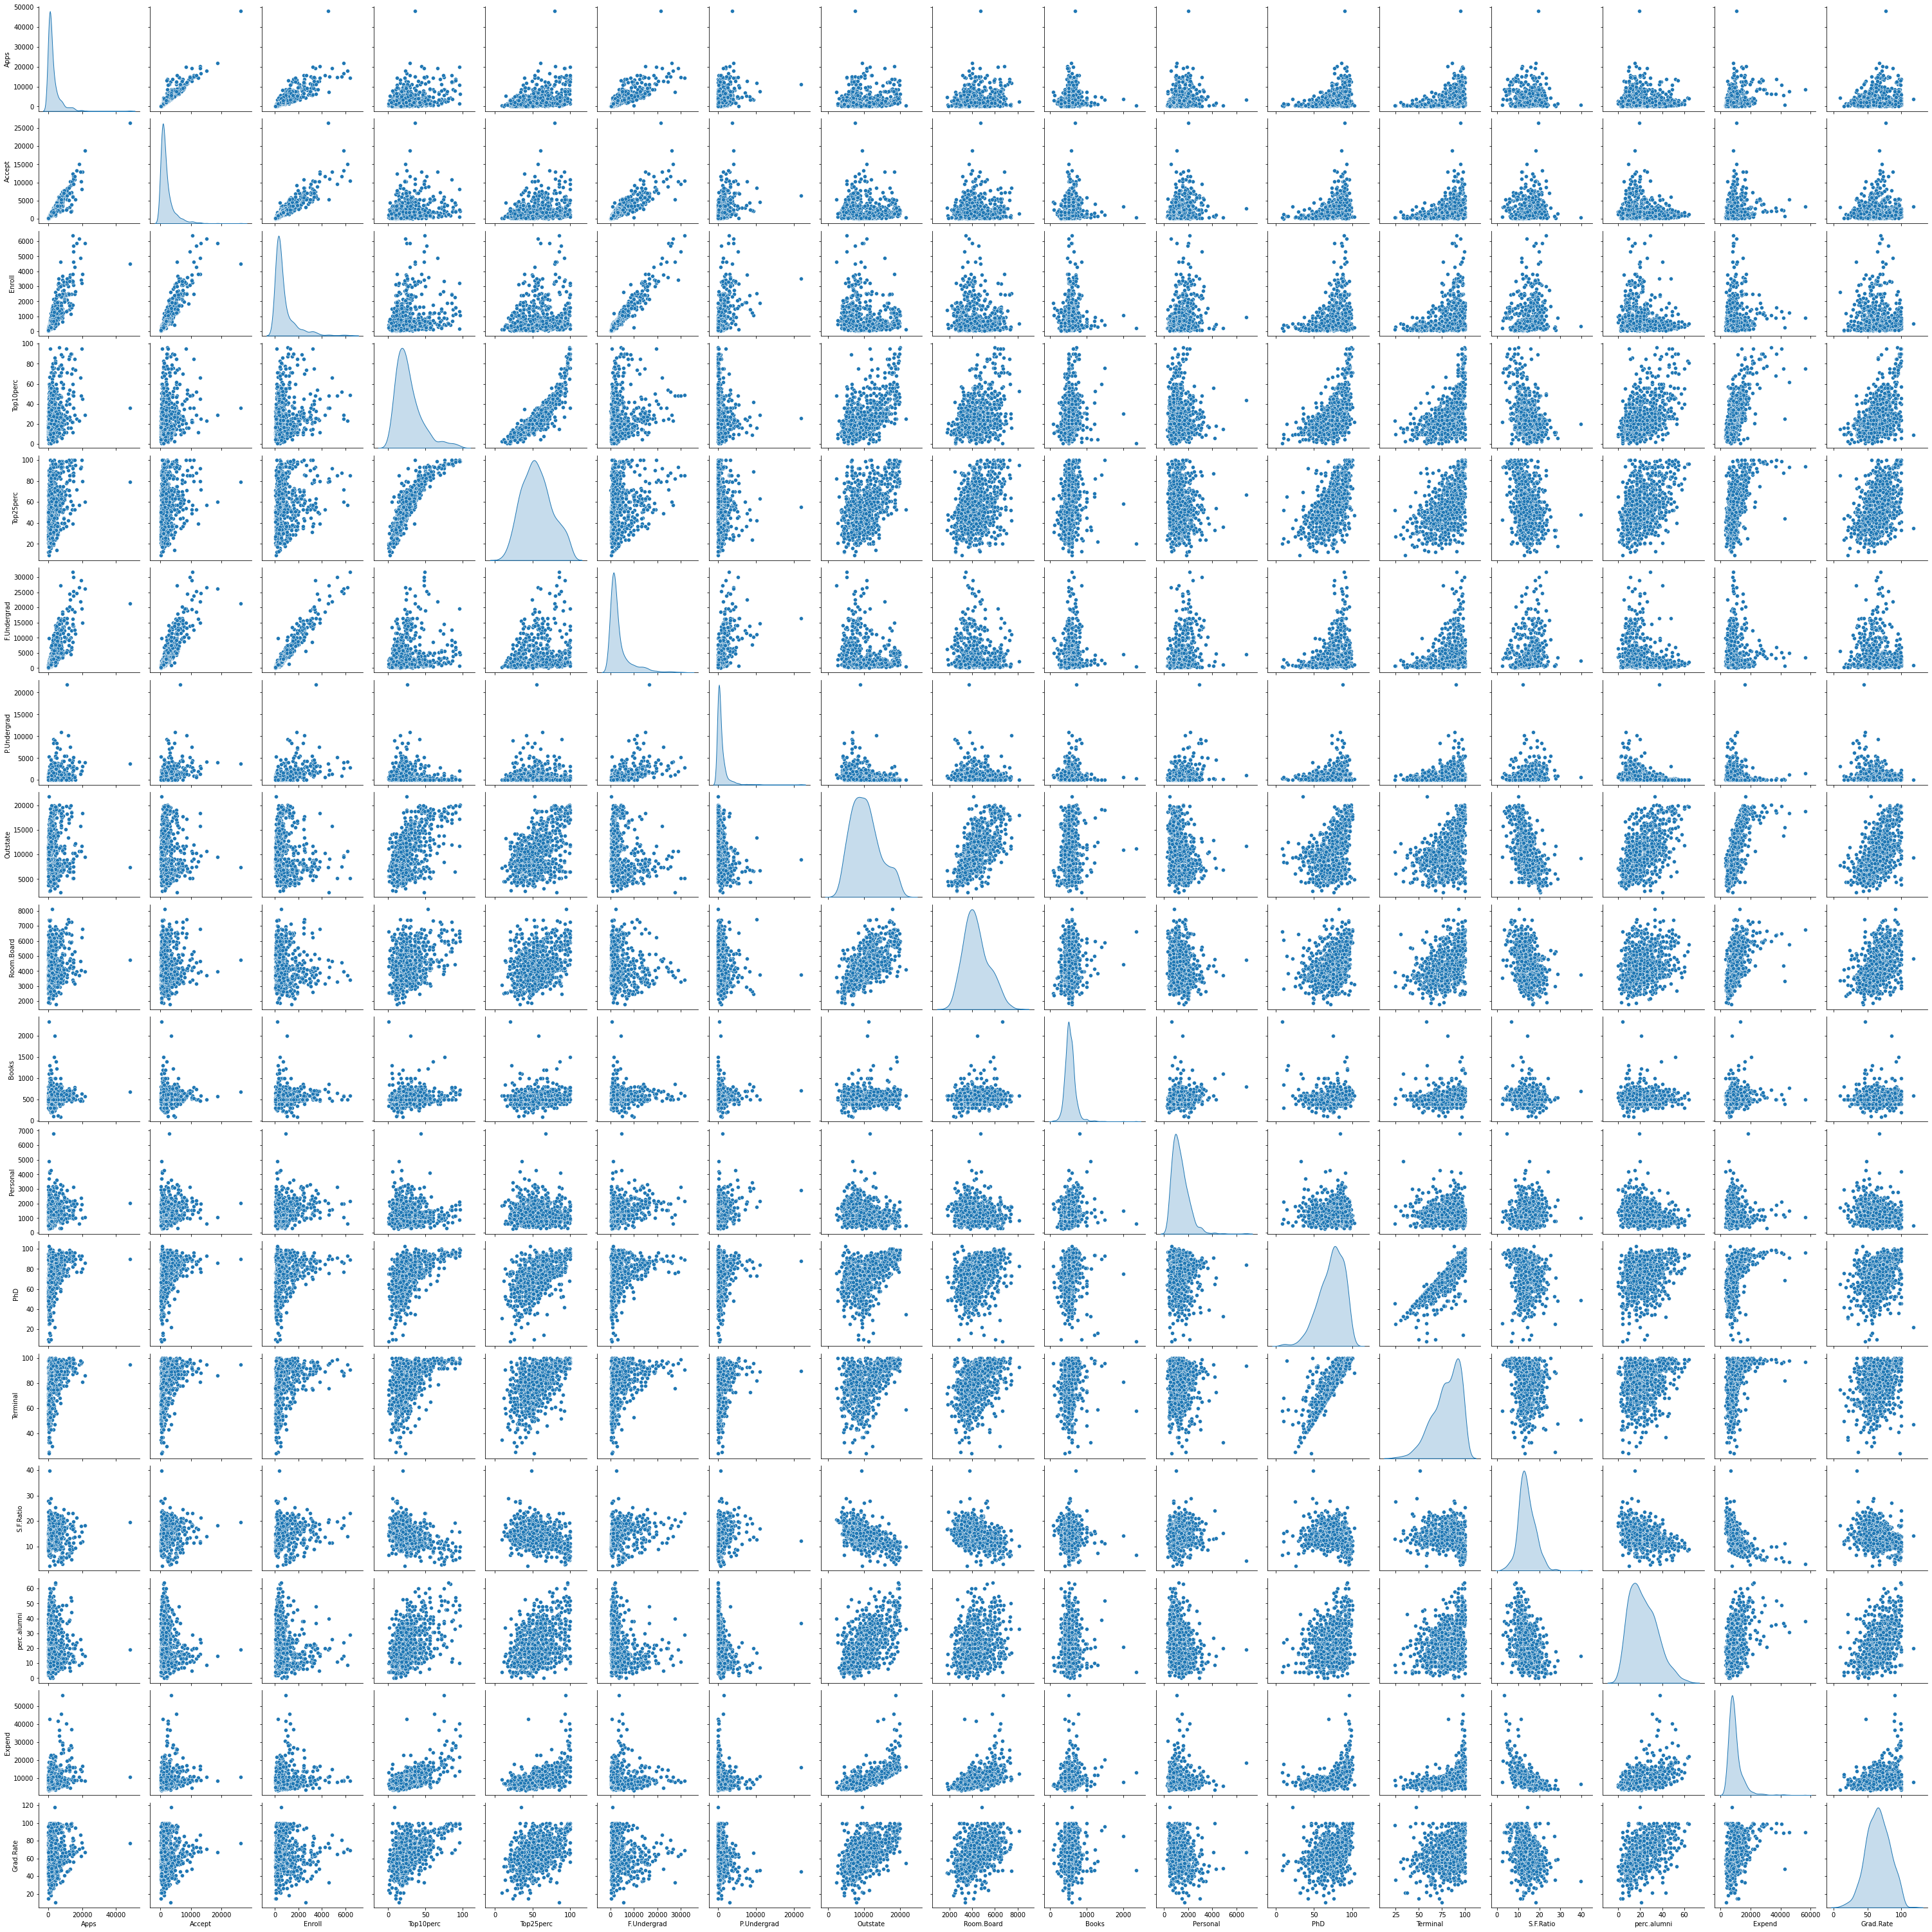

In [18]:
#Multivariate

sns.pairplot(d, diag_kind='kde')

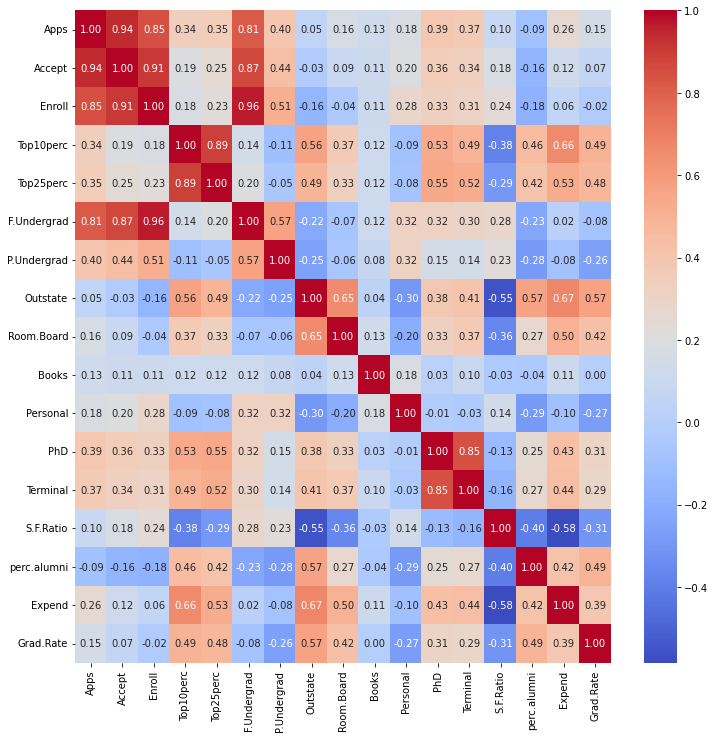

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(d_1, annot=True, fmt = '.2f', cmap='coolwarm')

In [ ]:
# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling

In [20]:
d_1 = d.drop(['Names'], axis =1)
from scipy.stats import zscore
d_z=d_1.apply(zscore)
d_z.head()

Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
0 -0.346882 -0.321205 -0.063509  ...    -0.867574 -0.501910  -0.318252
1 -0.210884 -0.038703 -0.288584  ...    -0.544572  0.166110  -0.551262
2 -0.406866 -0.376318 -0.478121  ...     0.585935 -0.177290  -0.667767
3 -0.668261 -0.681682 -0.692427  ...     1.151188  1.792851  -0.376504
4 -0.726176 -0.764555 -0.780735  ...    -1.675079  0.241803  -2.939613

[5 rows x 17 columns]

In [18]:
# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [22]:
cov_matrix = np.cov(d_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [23]:
d_z1 = d_z.corr()
d_z1

Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
Apps         1.000000  0.943451  0.846822  ...    -0.090226  0.259592   0.146755
Accept       0.943451  1.000000  0.911637  ...    -0.159990  0.124717   0.067313
Enroll       0.846822  0.911637  1.000000  ...    -0.180794  0.064169  -0.022341
Top10perc    0.338834  0.192447  0.181294  ...     0.455485  0.660913   0.494989
Top25perc    0.351640  0.247476  0.226745  ...     0.417864  0.527447   0.477281
F.Undergrad  0.814491  0.874223  0.964640  ...    -0.229462  0.018652  -0.078773
P.Undergrad  0.398264  0.441271  0.513069  ...    -0.280792 -0.083568  -0.257001
Outstate     0.050159 -0.025755 -0.155477  ...     0.566262  0.672779   0.571290
Room.Board   0.164939  0.090899 -0.040232  ...     0.272363  0.501739   0.424942
Books        0.132559  0.113525  0.112711  ...    -0.040208  0.112409   0.001061
Personal     0.178731  0.200989  0.280929  ...    -0.285968 -0.097892  -0.269344
PhD          0.390697  0.355758  0.331469  ...     0.249009  0.432762   0.305038
Terminal     0.369491  0.337583  0.308274  ...     0.267130  0.438799   0.289527
S.F.Ratio    0.095633  0.176229  0.237271  ...    -0.402929 -0.583832  -0.306710
perc.alumni -0.090226 -0.159990 -0.180794  ...     1.000000  0.417712   0.490898
Expend       0.259592  0.124717  0.064169  ...     0.417712  1.000000   0.390343
Grad.Rate    0.146755  0.067313 -0.022341  ...     0.490898  0.390343   1.000000

[17 rows x 17 columns]

In [25]:
# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?


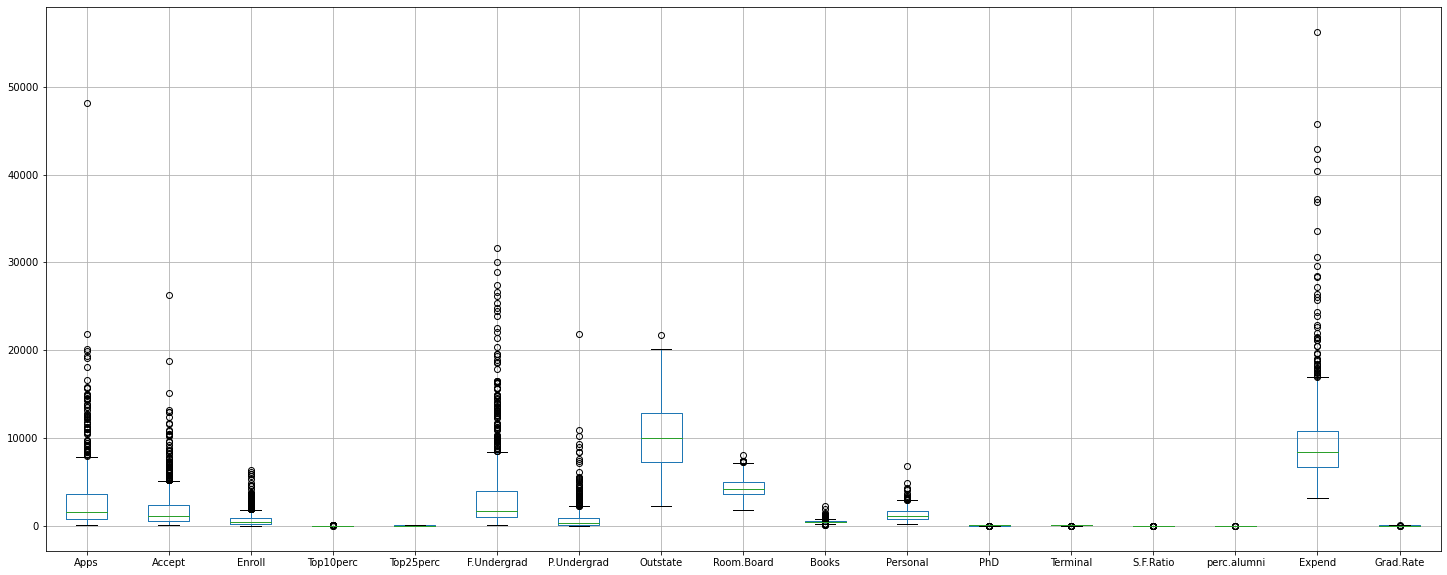

In [24]:
d.boxplot(figsize=(25,10))

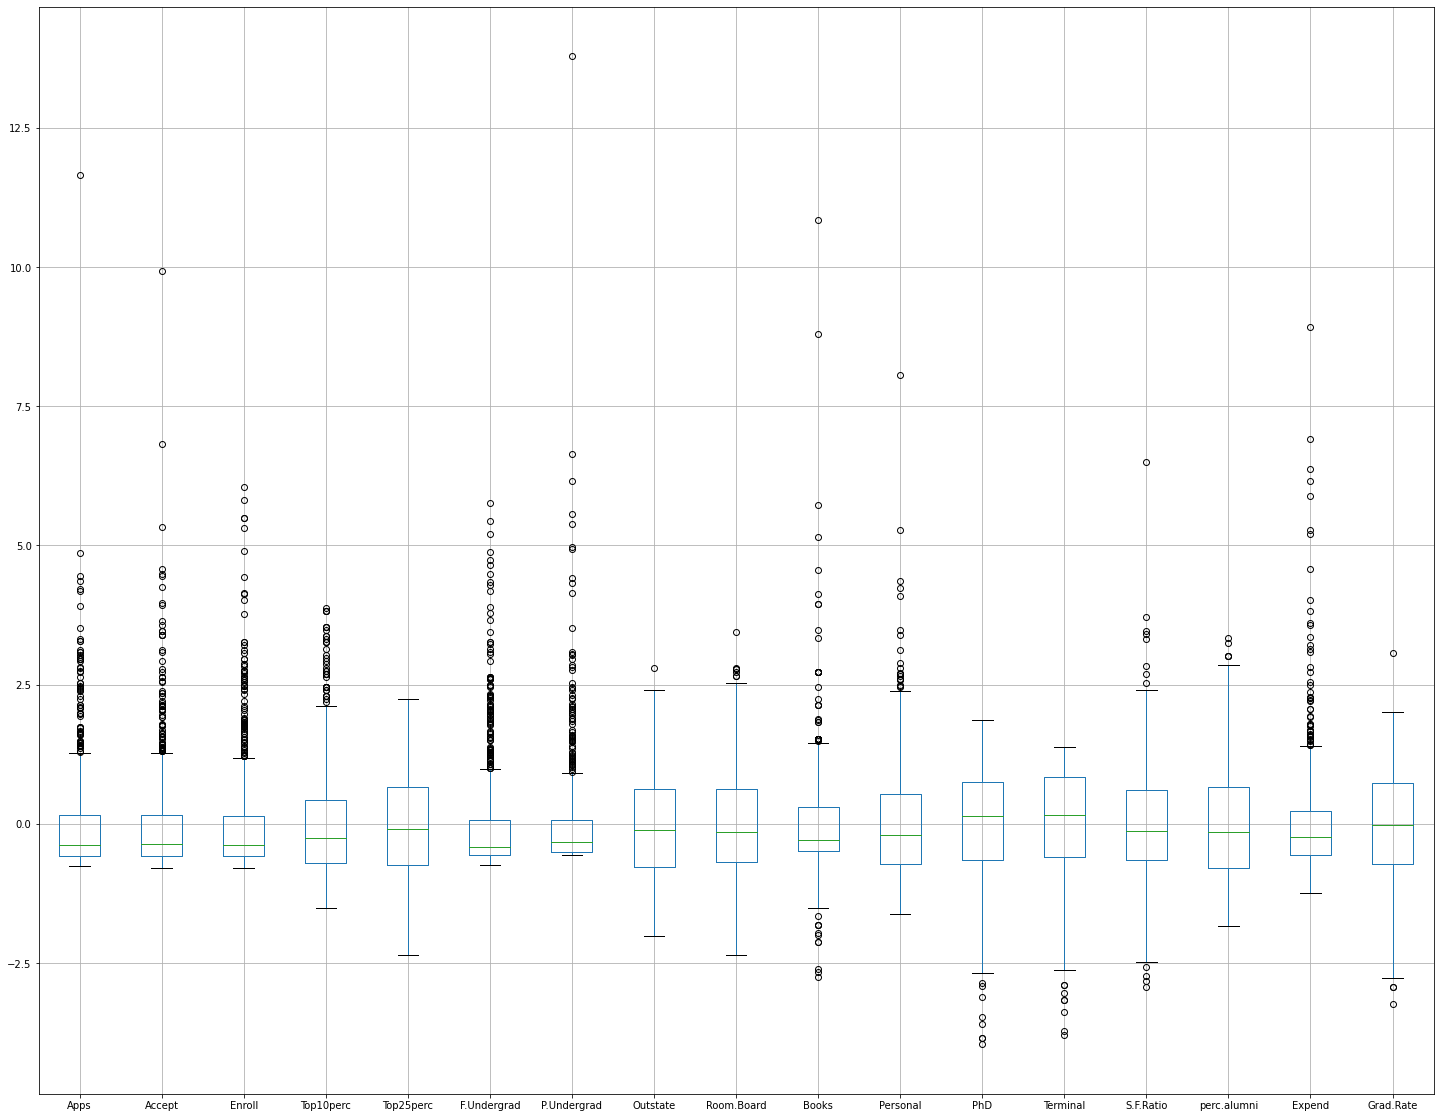

In [26]:
d_z.boxplot(figsize=(25,20))

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

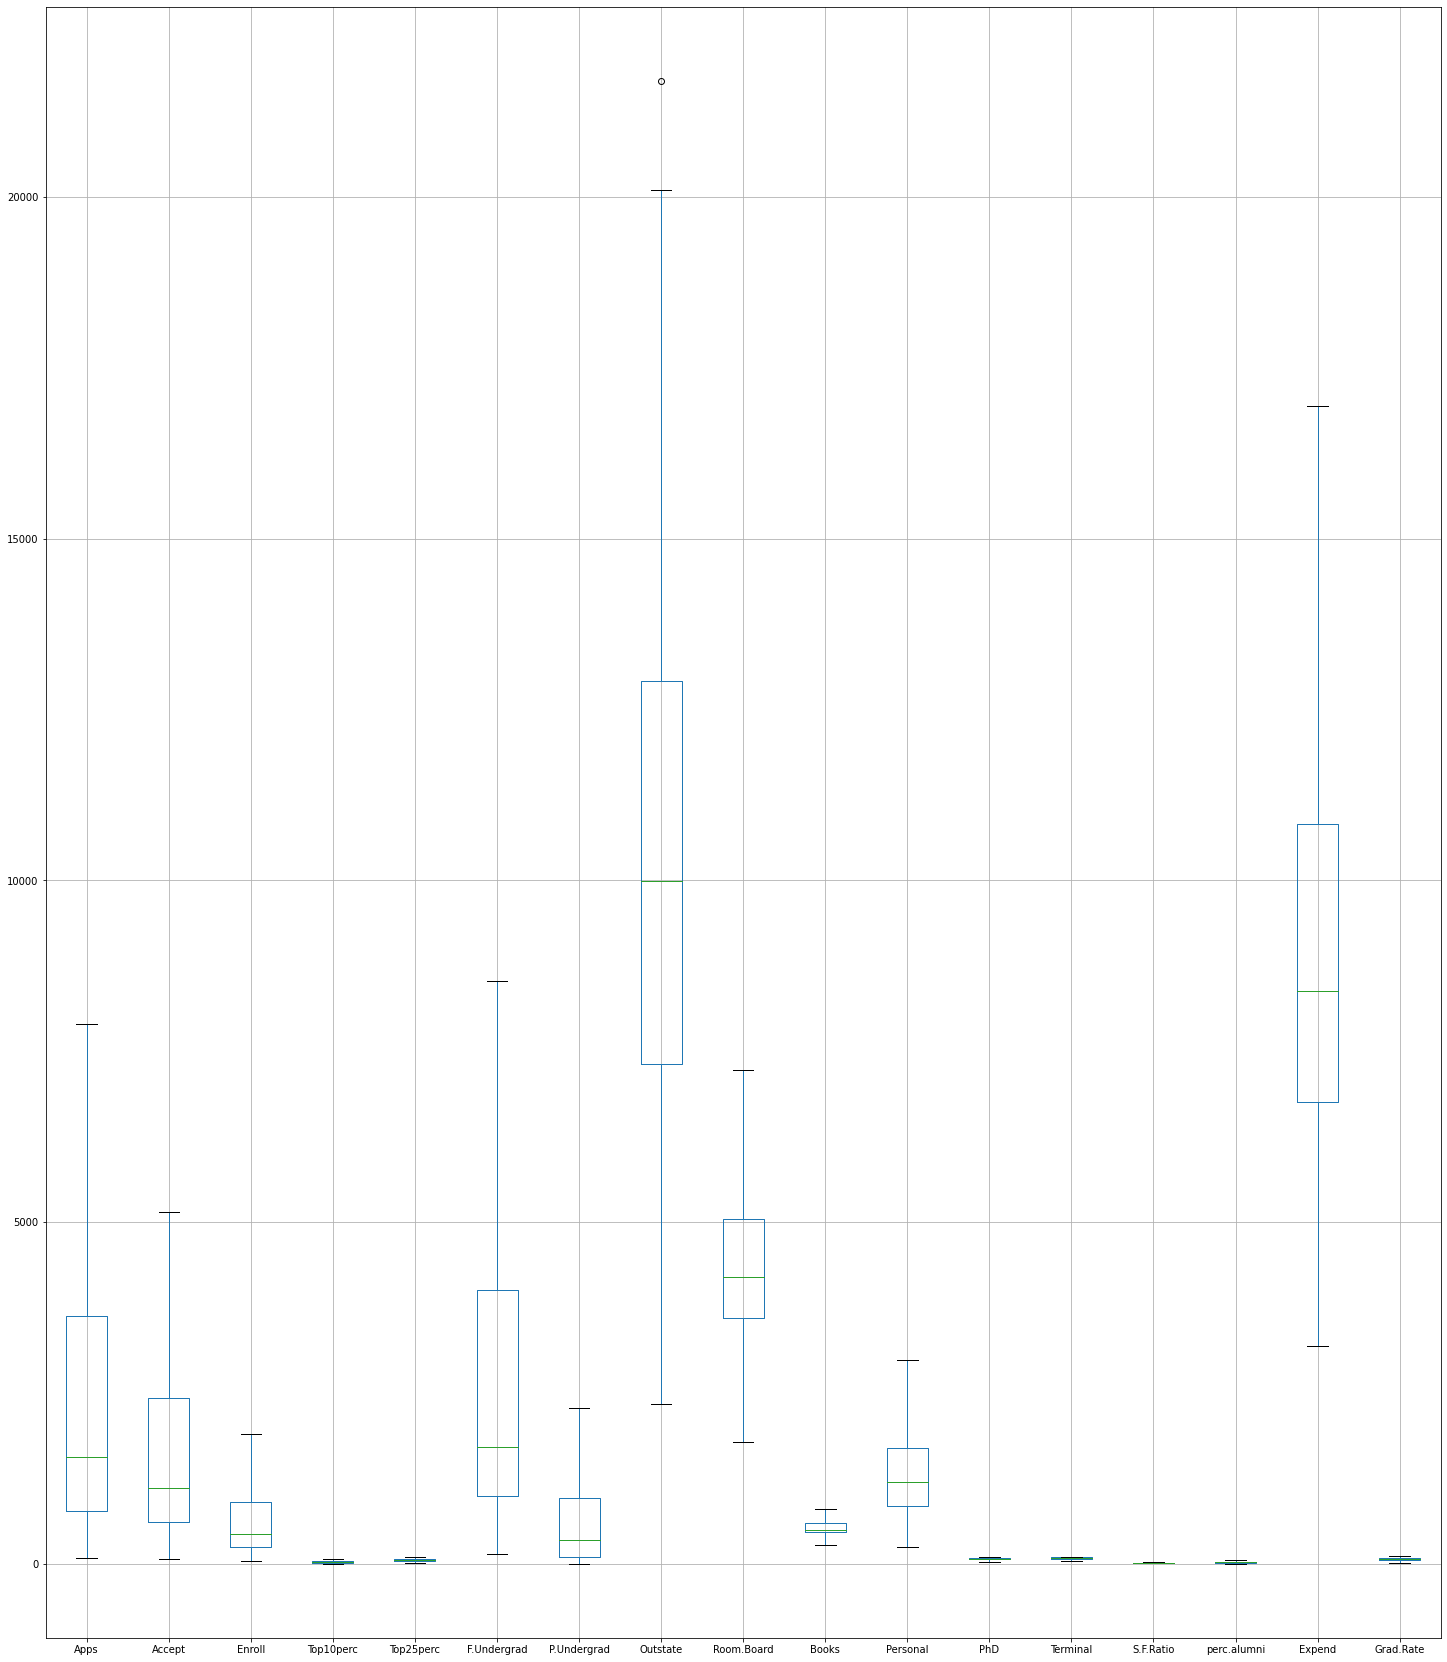

In [28]:
lratio,uratio=remove_outlier(d['Apps'])
d['Apps']=np.where(d['Apps']>uratio,uratio,d['Apps'])
d['Apps']=np.where(d['Apps']<lratio,lratio,d['Apps'])

lratio,uratio=remove_outlier(d['Accept'])
d['Accept']=np.where(d['Accept']>uratio,uratio,d['Accept'])
d['Accept']=np.where(d['Accept']<lratio,lratio,d['Accept'])

lratio,uratio=remove_outlier(d['Enroll'])
d['Enroll']=np.where(d['Enroll']>uratio,uratio,d['Enroll'])
d['Enroll']=np.where(d['Enroll']<lratio,lratio,d['Enroll'])

lratio,uratio=remove_outlier(d['Top10perc'])
d['Top10perc']=np.where(d['Top10perc']>uratio,uratio,d['Top10perc'])
d['Top10perc']=np.where(d['Top10perc']<lratio,lratio,d['Top10perc'])

lratio,uratio=remove_outlier(d['F.Undergrad'])
d['F.Undergrad']=np.where(d['F.Undergrad']>uratio,uratio,d['F.Undergrad'])
d['F.Undergrad']=np.where(d['F.Undergrad']<lratio,lratio,d['F.Undergrad'])

lratio,uratio=remove_outlier(d['P.Undergrad'])
d['P.Undergrad']=np.where(d['P.Undergrad']>uratio,uratio,d['P.Undergrad'])
d['P.Undergrad']=np.where(d['P.Undergrad']<lratio,lratio,d['P.Undergrad'])

lratio,uratio=remove_outlier(d['Room.Board'])
d['Room.Board']=np.where(d['Room.Board']>uratio,uratio,d['Room.Board'])
d['Room.Board']=np.where(d['Room.Board']<lratio,lratio,d['Room.Board'])

lratio,uratio=remove_outlier(d['Books'])
d['Books']=np.where(d['Books']>uratio,uratio,d['Books'])
d['Books']=np.where(d['Books']<lratio,lratio,d['Books'])

lratio,uratio=remove_outlier(d['Personal'])
d['Personal']=np.where(d['Personal']>uratio,uratio,d['Personal'])
d['Personal']=np.where(d['Personal']<lratio,lratio,d['Personal'])

lratio,uratio=remove_outlier(d['PhD'])
d['PhD']=np.where(d['PhD']>uratio,uratio,d['PhD'])
d['PhD']=np.where(d['PhD']<lratio,lratio,d['PhD'])

lratio,uratio=remove_outlier(d['Terminal'])
d['Terminal']=np.where(d['Terminal']>uratio,uratio,d['Terminal'])
d['Terminal']=np.where(d['Terminal']<lratio,lratio,d['Terminal'])

lratio,uratio=remove_outlier(d['S.F.Ratio'])
d['S.F.Ratio']=np.where(d['S.F.Ratio']>uratio,uratio,d['S.F.Ratio'])
d['S.F.Ratio']=np.where(d['S.F.Ratio']<lratio,lratio,d['S.F.Ratio'])

lratio,uratio=remove_outlier(d['perc.alumni'])
d['perc.alumni']=np.where(d['perc.alumni']>uratio,uratio,d['perc.alumni'])
d['perc.alumni']=np.where(d['perc.alumni']<lratio,lratio,d['perc.alumni'])

lratio,uratio=remove_outlier(d['Expend'])
d['Expend']=np.where(d['Expend']>uratio,uratio,d['Expend'])
d['Expend']=np.where(d['Expend']<lratio,lratio,d['Expend'])

lratio,uratio=remove_outlier(d['Grad.Rate'])
d['Grad.Rate']=np.where(d['Grad.Rate']>uratio,uratio,d['Grad.Rate'])
d['Grad.Rate']=np.where(d['Grad.Rate']<lratio,lratio,d['Grad.Rate'])

plt.subplots(figsize=(25,30))
d.boxplot(figsize=(25,20))

In [29]:
# 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [34]:
from scipy.stats import zscore
d_z=d_1.apply(zscore)
d_z.head()

Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
0 -0.346882 -0.321205 -0.063509  ...    -0.867574 -0.501910  -0.318252
1 -0.210884 -0.038703 -0.288584  ...    -0.544572  0.166110  -0.551262
2 -0.406866 -0.376318 -0.478121  ...     0.585935 -0.177290  -0.667767
3 -0.668261 -0.681682 -0.692427  ...     1.151188  1.792851  -0.376504
4 -0.726176 -0.764555 -0.780735  ...    -1.675079  0.241803  -2.939613

[5 rows x 17 columns]

In [35]:
d_z.T

0         1         2    ...       774       775       776
Apps        -0.346882 -0.210884 -0.406866  ... -0.233895  1.991711 -0.003268
Accept      -0.321205 -0.038703 -0.376318  ... -0.042377  0.177256 -0.066872
Enroll      -0.063509 -0.288584 -0.478121  ... -0.091509  0.578333 -0.095816
Top10perc   -0.258583 -0.655656 -0.315307  ...  0.365389  3.825595  0.025041
Top25perc   -0.191827 -1.353911 -0.292878  ...  0.262901  2.182866  0.363952
F.Undergrad -0.168116 -0.209788 -0.549565  ... -0.187095  0.312977 -0.146867
P.Undergrad -0.209207  0.244307 -0.497090  ... -0.453053 -0.507606  0.572283
Outstate    -0.746356  0.457496  0.201305  ... -0.880670  2.337894 -1.355744
Room.Board  -0.964905  1.909208 -0.554317  ... -0.143730  1.963953 -0.727676
Books       -0.602312  1.215880 -0.905344  ...  0.409815  0.488603 -0.299280
Personal     1.270045  0.235515 -0.259582  ... -0.827095  1.144424 -0.133960
PhD         -0.163028 -2.675646 -1.204845  ... -0.346878  1.430339  0.143389
Terminal    -0.115729 -3.378176 -0.931341  ... -0.319632  1.107689 -0.319632
S.F.Ratio    1.013776 -0.477704 -0.300749  ...  0.078441 -2.095582  1.013776
perc.alumni -0.867574 -0.544572  0.585935  ... -0.221570  2.120194  0.424434
Expend      -0.501910  0.166110 -0.177290  ... -0.256241  5.887971 -0.987116
Grad.Rate   -0.318252 -0.551262 -0.667767  ... -0.959029  1.953595  1.953595

[17 rows x 777 columns]

In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

In [37]:
# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [39]:
pca = PCA(n_components=17)
X_pca= pca.fit_transform(d_z)

In [40]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [41]:
d_z.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [42]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [43]:
# Data frame 

df = pd.DataFrame(data =pca.components_ ,  
                  columns = d_z.columns)

In [44]:
df.head()

Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
0  0.248766  0.207602  0.176304  ...     0.205082  0.318909   0.252316
1  0.331598  0.372117  0.403724  ...    -0.246595 -0.131690  -0.169241
2 -0.063092 -0.101249 -0.082986  ...    -0.146989  0.226744  -0.208065
3  0.281311  0.267817  0.161827  ...     0.017314  0.079273   0.269129
4  0.005741  0.055786 -0.055694  ...    -0.216297  0.075958  -0.109268

[5 rows x 17 columns]

In [45]:
# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [46]:
print('The Linear eq of 1st component: ')
for i in range(0,d_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),d_z.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.249 * Apps + 0.208 * Accept + 0.176 * Enroll + 0.354 * Top10perc + 0.344 * Top25perc + 0.155 * F.Undergrad + 0.026 * P.Undergrad + 0.295 * Outstate + 0.249 * Room.Board + 0.065 * Books + -0.043 * Personal + 0.318 * PhD + 0.317 * Terminal + -0.177 * S.F.Ratio + 0.205 * perc.alumni + 0.319 * Expend + 0.252 * Grad.Rate + 

In [47]:
# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

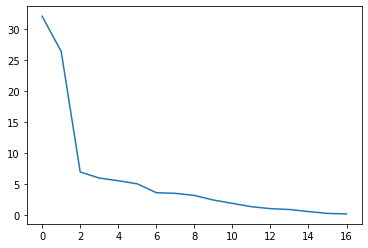

In [52]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

pca = PCA(n_components=5)
X_pca= pca.fit_transform(d_z)

pca.components_

plt.plot(var_exp)



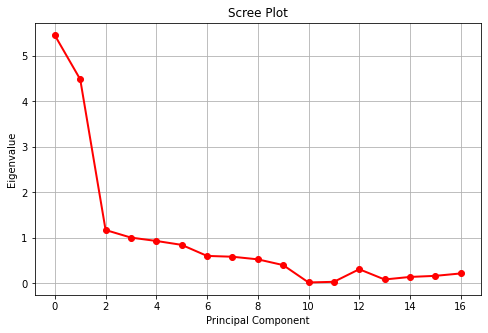

In [53]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(d_z.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



In [56]:
df_comp = pd.DataFrame(pca.components_,columns=list(d_z))
df_comp




Apps    Accept    Enroll  ...  perc.alumni    Expend  Grad.Rate
0  0.248766  0.207602  0.176304  ...     0.205082  0.318909   0.252316
1  0.331598  0.372117  0.403724  ...    -0.246595 -0.131690  -0.169241
2 -0.063092 -0.101249 -0.082986  ...    -0.146989  0.226744  -0.208065
3  0.281311  0.267817  0.161827  ...     0.017314  0.079273   0.269129
4  0.005742  0.055786 -0.055694  ...    -0.216297  0.075958  -0.109268

[5 rows x 17 columns]

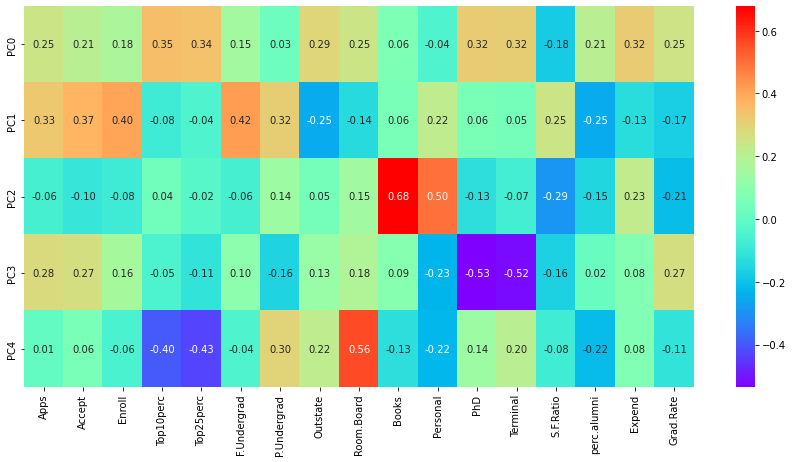

In [57]:
plt.figure(figsize= (15,7))
sns.heatmap(df_comp, cmap= 'rainbow', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()